In [1]:
import plotly.graph_objects as go
import pandas as pd
import os

%reload_ext autoreload
%autoreload 2
%aimport AFM_lib

In [2]:
path = "/Users/sfiligoj/Desktop/Ruthenium under heat chapter/SSP_AFM_all"
os.chdir(path)

file = 'Ru_H_800C_XPS_FLAT.033.txt'

original = np.genfromtxt(file, skip_header=1).reshape(512,512).astype(float)
# Z = AFM_lib.remove_outliers(original,threshold=3.5)   #was 3

np.savetxt(f"{file}_3D.csv", original, delimiter=",")

# original = np.genfromtxt(file, skip_header=1).reshape(512,512,3)  

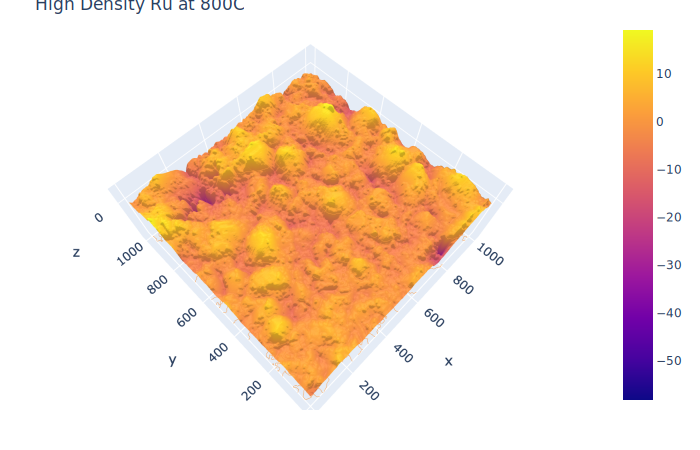

In [12]:
z_data = pd.read_csv(f'{file}_3D.csv')
z = z_data.values
sh_0, sh_1 = z.shape

# z /= StepSize # this converts the height in (#px of transversal axes)
N_Pixel =512
ScanSize = 1000
StepSize = ScanSize/N_Pixel                          # nm/px     

Zmax = np.max(z)
Zmin = np.min(z)

Zdelta = np.abs(Zmax-Zmin) # physical dimension in axial direction
Xdelta = ScanSize

aspect_ratio = Zdelta / Xdelta 

x, y = np.linspace(0, ScanSize, num=sh_0), np.linspace(0, ScanSize, num=sh_1)
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y,
# https://plotly.com/python/v3/3d-surface-lighting/
#                                 lighting=dict(
#                                 ambient=0.9,
#                                 diffuse=1,
#                                 fresnel=4,        
#                                 specular=0.5,
#                                 roughness=0.5
#                                              ),
#                                 lightposition=dict(x=100,
#                                 y=100,
#                                 z=2000),
                                )])


name = 'High Density Ru at 800C'
fig.update_layout(title= name, 
                  width=800, height=800,
                  margin=dict(l=20, r=40, b=40, t=20),
                  scene = dict(
                    xaxis = dict(
                        nticks=6,),
                    yaxis = dict(
                        nticks=6,),
                    zaxis = dict(
                        nticks=1,),)
                 )
fig.update_layout(scene_aspectmode='manual',
                  scene_aspectratio=dict(x=1, y=1, z = aspect_ratio*5),
                 )

# Adding contours
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
# Set viewpoint:
fig.update_layout(autosize=False,
                  scene_camera_eye=dict(x=-0.6, y=-0.6, z=1.6),
                 )

# Set Range:
# fig.update_layout(
#     scene = dict(xaxis = dict(nticks=5, range=[0,1000],),
#                  yaxis = dict(nticks=5, range=[0,1000],),
#                  zaxis = dict(nticks=3, range=[-Zmin*1.1,Zmax*30],),),
#                  )






fig.show(renderer="svg")
# fig.write_image(f"Plotly images/3D plot for file.svg")

